# Undersampling

This notebook discusses Multi-label classification methods using undersampling for the [academia.stackexchange.com](https://academia.stackexchange.com/).

## Table of Contents
* [Data import](#data_import)
* [Data preparation](#data_preparation)
* [Methods](#methods)
* [Evaluation](#evaluation)

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from joblib import dump, load
from pathlib import Path
from academia_tag_recommender.definitions import MODELS_PATH
from academia_tag_recommender.classifier import Classifier, available_classifier_paths

RANDOM_STATE = 0

<a id='data_import'/>

## Data import

In [2]:
from academia_tag_recommender.data import documents
from academia_tag_recommender.test_train_data import get_X_reduced, get_y, get_test_train_data
from academia_tag_recommender.preprocessing_definition import PreprocessingDefinition

def get_X():
    return np.vstack([document.text for document in documents])
y = get_y()

X_train, X_test, y_train, y_test = get_test_train_data(get_X(), y, scale=False)
print('Train set with shape ', X_train.shape)
print('Test set with shape', X_test.shape)

preprocessing = PreprocessingDefinition('tfidf', 'basic', 'basic', 'english', '1,1', 'TruncatedSVD')
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = get_test_train_data(get_X_reduced(preprocessing), y)

Train set with shape  (24812, 1)
Test set with shape (8270, 1)


<a id='data_preparation'/>

## Data Preparation

In [3]:
from academia_tag_recommender.embedded_data import word2vec, doc2vec, fasttext2vec

In [4]:
def get_data(embedding):
    if embedding == 'word2vec':
        X_train_, X_test_ = word2vec(X_train, X_test)
        return X_train_, X_test_, y_train, y_test
    elif embedding == 'doc2vec':
        X_train_, X_test_ = doc2vec(X_train, X_test, y)
        return X_train_, X_test_, y_train, y_test
    elif embedding == 'fasttext':
        X_train_, X_test_ = fasttext2vec(X_train, X_test)
        return X_train_, X_test_, y_train, y_test
    else:
        return X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf

In [5]:
paths = available_classifier_paths('classwise')
def create_classifier(classifier, name, embedding=''):
    path = [path for path in paths if name in path.name]
    if len(path) > 0:
        clf = load(path[0])
    else:
        preprocessing = PreprocessingDefinition(embedding, 'basic', 'basic', 'english', '1,1', 'None')
        clf = Classifier(classifier, preprocessing, name)
        X_train_, X_test_, y_train_, y_test_ = get_data(embedding)
        clf.fit(X_train_, y_train_)
        clf.score(X_test_, y_test_)
        clf.save('classwise')
    print('Training: {}s'.format(clf.training_time))
    print('Test: {}s'.format(clf.test_time))
    clf.evaluation.print_stats()

<a id='methods'/>

## Methods



In [6]:
from academia_tag_recommender.classwise_classifier import ClasswiseClassifier, ClassifierOption
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

**Word2Vec**

In [7]:
classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]})]
create_classifier(ClasswiseClassifier(classifier_options, 'word2vec'), 'ClasswiseClassifier(LinearSVC)', 'word2vec')

Training: 4884.589846611023s
Test: 3.241490364074707s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013246992935785655     0.04171704957678356      0.05845473215485307      0.027900040306328092     0.035317861635878564     
micro                                                            0.5020850708924104       0.028914505283381364     0.054680049048548986     
macro                                                            0.10057778141120874      0.02192042246399677      0.027053577481604064     


In [8]:
classifier_options = [ClassifierOption(LogisticRegression(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]})]
create_classifier(ClasswiseClassifier(classifier_options, 'word2vec'), 'ClasswiseClassifier(LogisticRegression)', 'word2vec')

Training: 337.219664812088s
Test: 3.4518344402313232s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.014138611340927894     0.03869407496977025      0.06915597217823549      0.042629987908101574     0.046411539180406094     
micro                                                            0.2850985221674877       0.04447646493756004      0.07694864550440418      
macro                                                            0.11651878853494115      0.038034780580268594     0.04231579970649975      


In [9]:
classifier_options = [ClassifierOption(MLPClassifier(random_state=RANDOM_STATE), grid_search=False)]
create_classifier(ClasswiseClassifier(classifier_options, 'word2vec'), 'ClasswiseClassifier(MLPClassifier)', 'word2vec')

Training: 1619.7250578403473s
Test: 9.419735431671143s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.016607904283077707     0.029866989117291416     0.13074460589122014      0.09403869407496976      0.09686521613152242      
micro                                                            0.214192849404117        0.09495677233429395      0.13158069883527454      
macro                                                            0.09685705879616698      0.059211955240148446     0.06261356445528067      


**Doc2Vec**

In [10]:
classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]})]
create_classifier(ClasswiseClassifier(classifier_options, 'doc2vec'), 'ClasswiseClassifier(LinearSVC)', 'doc2vec')

Training: 4884.589846611023s
Test: 3.241490364074707s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013246992935785655     0.04171704957678356      0.05845473215485307      0.027900040306328092     0.035317861635878564     
micro                                                            0.5020850708924104       0.028914505283381364     0.054680049048548986     
macro                                                            0.10057778141120874      0.02192042246399677      0.027053577481604064     


In [11]:
classifier_options = [ClassifierOption(LogisticRegression(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]})]
create_classifier(ClasswiseClassifier(classifier_options, 'doc2vec'), 'ClasswiseClassifier(LogisticRegression)', 'doc2vec')

Training: 337.219664812088s
Test: 3.4518344402313232s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.014138611340927894     0.03869407496977025      0.06915597217823549      0.042629987908101574     0.046411539180406094     
micro                                                            0.2850985221674877       0.04447646493756004      0.07694864550440418      
macro                                                            0.11651878853494115      0.038034780580268594     0.04231579970649975      


In [12]:
classifier_options = [ClassifierOption(LogisticRegression(random_state=RANDOM_STATE), grid_search=False)]
create_classifier(ClasswiseClassifier(classifier_options, 'doc2vec'), 'ClasswiseClassifier(LogisticRegression2)', 'doc2vec')

Training: 25.80038595199585s
Test: 3.2044856548309326s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013804493094889582     0.039298669891172915     0.0569913385667529       0.03306126561870213      0.03707158221034891      
micro                                                            0.31220353600689954      0.03477425552353506      0.06257833095639395      
macro                                                            0.1271743801432338       0.02717906139179997      0.036243409714416114     


In [13]:
classifier_options = [ClassifierOption(MLPClassifier(random_state=RANDOM_STATE), grid_search=False)]
create_classifier(ClasswiseClassifier(classifier_options, 'doc2vec'), 'ClasswiseClassifier(MLPClassifier)', 'doc2vec')

Training: 1619.7250578403473s
Test: 9.419735431671143s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.016607904283077707     0.029866989117291416     0.13074460589122014      0.09403869407496976      0.09686521613152242      
micro                                                            0.214192849404117        0.09495677233429395      0.13158069883527454      
macro                                                            0.09685705879616698      0.059211955240148446     0.06261356445528067      


**FastText**

In [14]:
classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]})]
create_classifier(ClasswiseClassifier(classifier_options, 'fasttext'), 'ClasswiseClassifier(LinearSVC)', 'fasttext')

Training: 4884.589846611023s
Test: 3.241490364074707s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013246992935785655     0.04171704957678356      0.05845473215485307      0.027900040306328092     0.035317861635878564     
micro                                                            0.5020850708924104       0.028914505283381364     0.054680049048548986     
macro                                                            0.10057778141120874      0.02192042246399677      0.027053577481604064     


In [15]:
classifier_options = [ClassifierOption(LogisticRegression(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]})]
create_classifier(ClasswiseClassifier(classifier_options, 'fasttext'), 'ClasswiseClassifier(LogisticRegression)', 'fasttext')

Training: 337.219664812088s
Test: 3.4518344402313232s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.014138611340927894     0.03869407496977025      0.06915597217823549      0.042629987908101574     0.046411539180406094     
micro                                                            0.2850985221674877       0.04447646493756004      0.07694864550440418      
macro                                                            0.11651878853494115      0.038034780580268594     0.04231579970649975      


In [16]:
classifier_options = [ClassifierOption(MLPClassifier(random_state=RANDOM_STATE), grid_search=False)]
create_classifier(ClasswiseClassifier(classifier_options, 'fasttext'), 'ClasswiseClassifier(MLPClassifier)', 'fasttext')

Training: 1619.7250578403473s
Test: 9.419735431671143s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.016607904283077707     0.029866989117291416     0.13074460589122014      0.09403869407496976      0.09686521613152242      
micro                                                            0.214192849404117        0.09495677233429395      0.13158069883527454      
macro                                                            0.09685705879616698      0.059211955240148446     0.06261356445528067      


**TFIDF**

In [17]:
classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]})]
create_classifier(ClasswiseClassifier(classifier_options, 'tfidf'), 'ClasswiseClassifier(LinearSVC)', 'tfidf')

Training: 4884.589846611023s
Test: 3.241490364074707s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013246992935785655     0.04171704957678356      0.05845473215485307      0.027900040306328092     0.035317861635878564     
micro                                                            0.5020850708924104       0.028914505283381364     0.054680049048548986     
macro                                                            0.10057778141120874      0.02192042246399677      0.027053577481604064     


In [18]:
classifier_options = [ClassifierOption(LogisticRegression(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]})]
create_classifier(ClasswiseClassifier(classifier_options, 'tfidf'), 'ClasswiseClassifier(LogisticRegression)', 'tfidf')

Training: 337.219664812088s
Test: 3.4518344402313232s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.014138611340927894     0.03869407496977025      0.06915597217823549      0.042629987908101574     0.046411539180406094     
micro                                                            0.2850985221674877       0.04447646493756004      0.07694864550440418      
macro                                                            0.11651878853494115      0.038034780580268594     0.04231579970649975      


In [19]:
classifier_options = [ClassifierOption(MLPClassifier(random_state=RANDOM_STATE), grid_search=False)]
create_classifier(ClasswiseClassifier(classifier_options, 'tfidf'), 'ClasswiseClassifier(MLPClassifier)', 'tfidf')

Training: 1619.7250578403473s
Test: 9.419735431671143s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.016607904283077707     0.029866989117291416     0.13074460589122014      0.09403869407496976      0.09686521613152242      
micro                                                            0.214192849404117        0.09495677233429395      0.13158069883527454      
macro                                                            0.09685705879616698      0.059211955240148446     0.06261356445528067      


<a id='evaluation'/>

## Evaluation

In [20]:
paths = available_classifier_paths('classwise')

In [21]:
evals = []
for path in paths:
    clf = load(path)
    evaluation = clf.evaluation
    evals.append([str(clf) + ' ' + str(clf.preprocessing.vectorizer), evaluation])

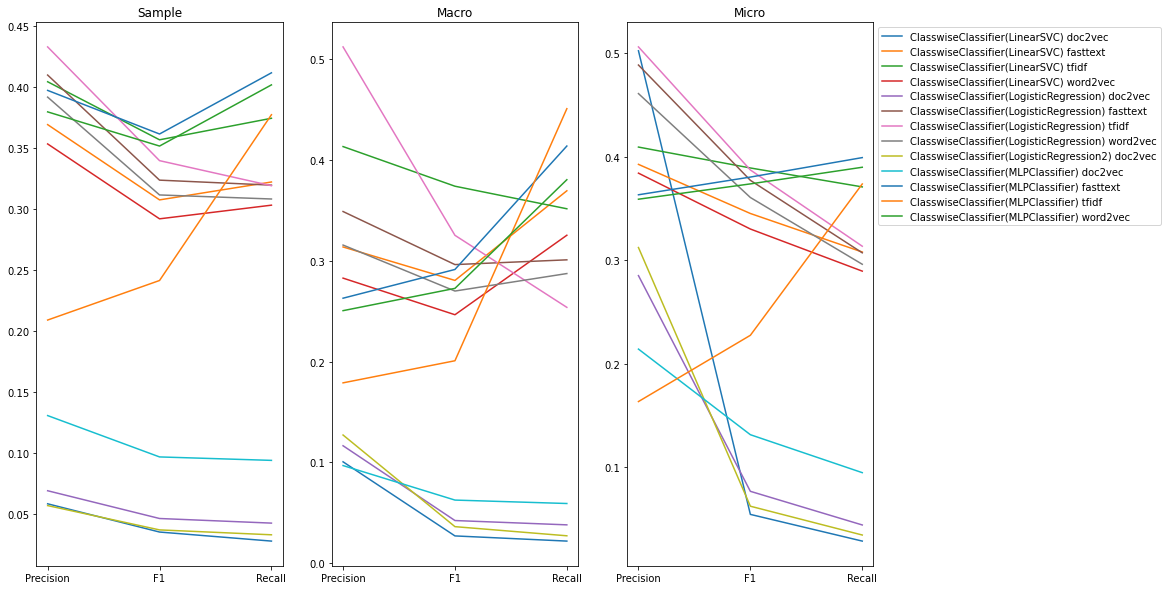

In [22]:
x_ = ['Precision', 'F1', 'Recall']
fig, axes = plt.subplots(1, 3, figsize=(15,10))
axes[0].set_title('Sample')
axes[1].set_title('Macro')
axes[2].set_title('Micro')
for eval_ in evals:
    evaluator = eval_[1]
    axes[0].plot(x_, [evaluator.precision_samples, evaluator.f1_samples, evaluator.recall_samples], label=eval_[0])
    axes[1].plot(x_, [evaluator.precision_macro, evaluator.f1_macro, evaluator.recall_macro], label=eval_[0])
    axes[2].plot(x_, [evaluator.precision_micro, evaluator.f1_micro, evaluator.recall_micro], label=eval_[0])
axes[2].legend(bbox_to_anchor=(1, 1), ncol=1)
plt.show()

In [23]:
top_3 = sorted(paths, key=lambda x: load(x).evaluation.recall_macro, reverse=True)[:3]

In [24]:
def per_label_accuracy(orig, prediction):
    if not isinstance(prediction, np.ndarray):
        prediction = prediction.toarray()
    l = 1 - orig - prediction
    return np.average(l, axis=0)

In [25]:
from sklearn.metrics import classification_report
classwise_results = []
for clf_path in top_3:
    clf = load(clf_path)
    _, X_test_, _, y_test_ = get_data(clf.preprocessing.vectorizer)
    prediction = clf.predict(X_test_)
    label_accuracies = per_label_accuracy(y_test_, prediction)
    report = classification_report(y_test_, prediction, output_dict=True, zero_division=0)
    classwise_report = {}
    for i, result in enumerate(report):
        if i < len(label_accuracies):
            classwise_report[result] = report[result]
            classwise_report[result]['accuracy'] = label_accuracies[int(result)]
    classwise_results.append((str(clf) + ' ' + str(clf.preprocessing.vectorizer), classwise_report))

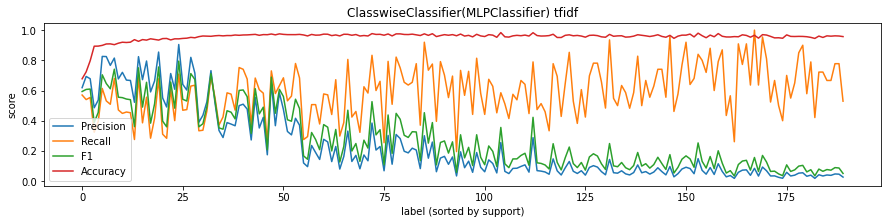

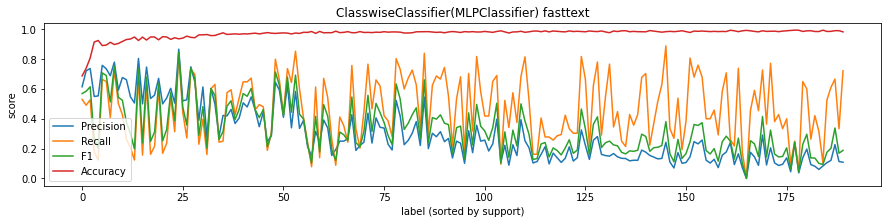

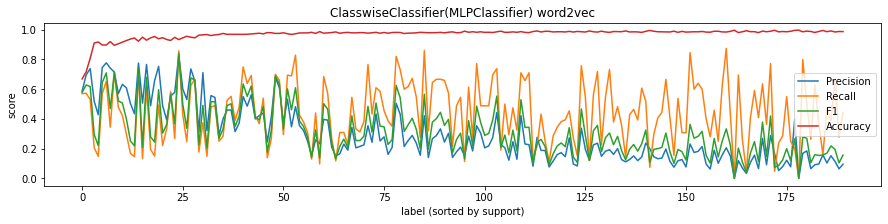

In [26]:
import numpy as np
x_ = np.arange(0, len(y_test[0]))
for classwise_result in classwise_results:
    name, results = classwise_result
    _, fig_1 = plt.subplots(figsize=(15,3))
    fig_1.set_title(name)
    sorted_results = sorted(results, key=lambda x: results[x]['support'], reverse=True)
    fig_1.plot(x_, [results[result]['precision'] for result in sorted_results][0:len(x_)], label='Precision')
    fig_1.plot(x_, [results[result]['recall'] for result in sorted_results][0:len(x_)], label='Recall')
    fig_1.plot(x_, [results[result]['f1-score'] for result in sorted_results][0:len(x_)], label='F1')
    fig_1.plot(x_, [results[result]['accuracy'] for result in sorted_results][0:len(x_)], label="Accuracy")
    fig_1.set_xlabel('label (sorted by support)')
    fig_1.set_ylabel('score')
    fig_1.legend(loc='best')
plt.show()